In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
sns.set()
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle
import sklearn.preprocessing as preproc 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.decomposition import PCA
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.metrics import r2_score





import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load libraries 2
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import SGD
from keras.layers import LSTM
from scikeras.wrappers import KerasClassifier

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


In [3]:
# Import Dataset and print cols

dataset = pd.read_csv('ANN_df.csv')

# Print the list of column names
print(dataset.columns)

Index(['Year', 'Access_to_electricity_(%_of_population)',
       'Adjusted_net_enrollment_rate,_primary_(%_of_primary_school_age_children)',
       'Adjusted_net_national_income_(constant_2015_US$)',
       'Adjusted_net_national_income_per_capita_(annual_%_growth)',
       'Adjusted_net_national_income_per_capita_(constant_2015_US$)',
       'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_bottom_40%_of_population_(%)',
       'Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)',
       'CPIA_social_protection_rating_(1=low_to_6=high)',
       'CPIA_trade_rating_(1=low_to_6=high)',
       ...
       'Country_Name_Sub-Saharan Africa',
       'Country_Name_Sub-Saharan Africa (IDA & IBRD countries)',
       'Country_Name_Sub-Saharan Africa (excluding high income)',
       'Country_Name_Sudan', 'Country_Name_Tanzania', 'Country_Name_Togo',
       'Country_Name_Uganda', 'Country_Name_World', 'Countr

In [4]:
# Define X and Y variables from data

X = dataset.drop('GDP_per_capita_(constant_2015_US$)', axis=1)
Y = dataset['GDP_per_capita_(constant_2015_US$)']


In [5]:
# Split validation dataset 

validation_size = 0.2
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [6]:
dataset.shape

(1166, 158)

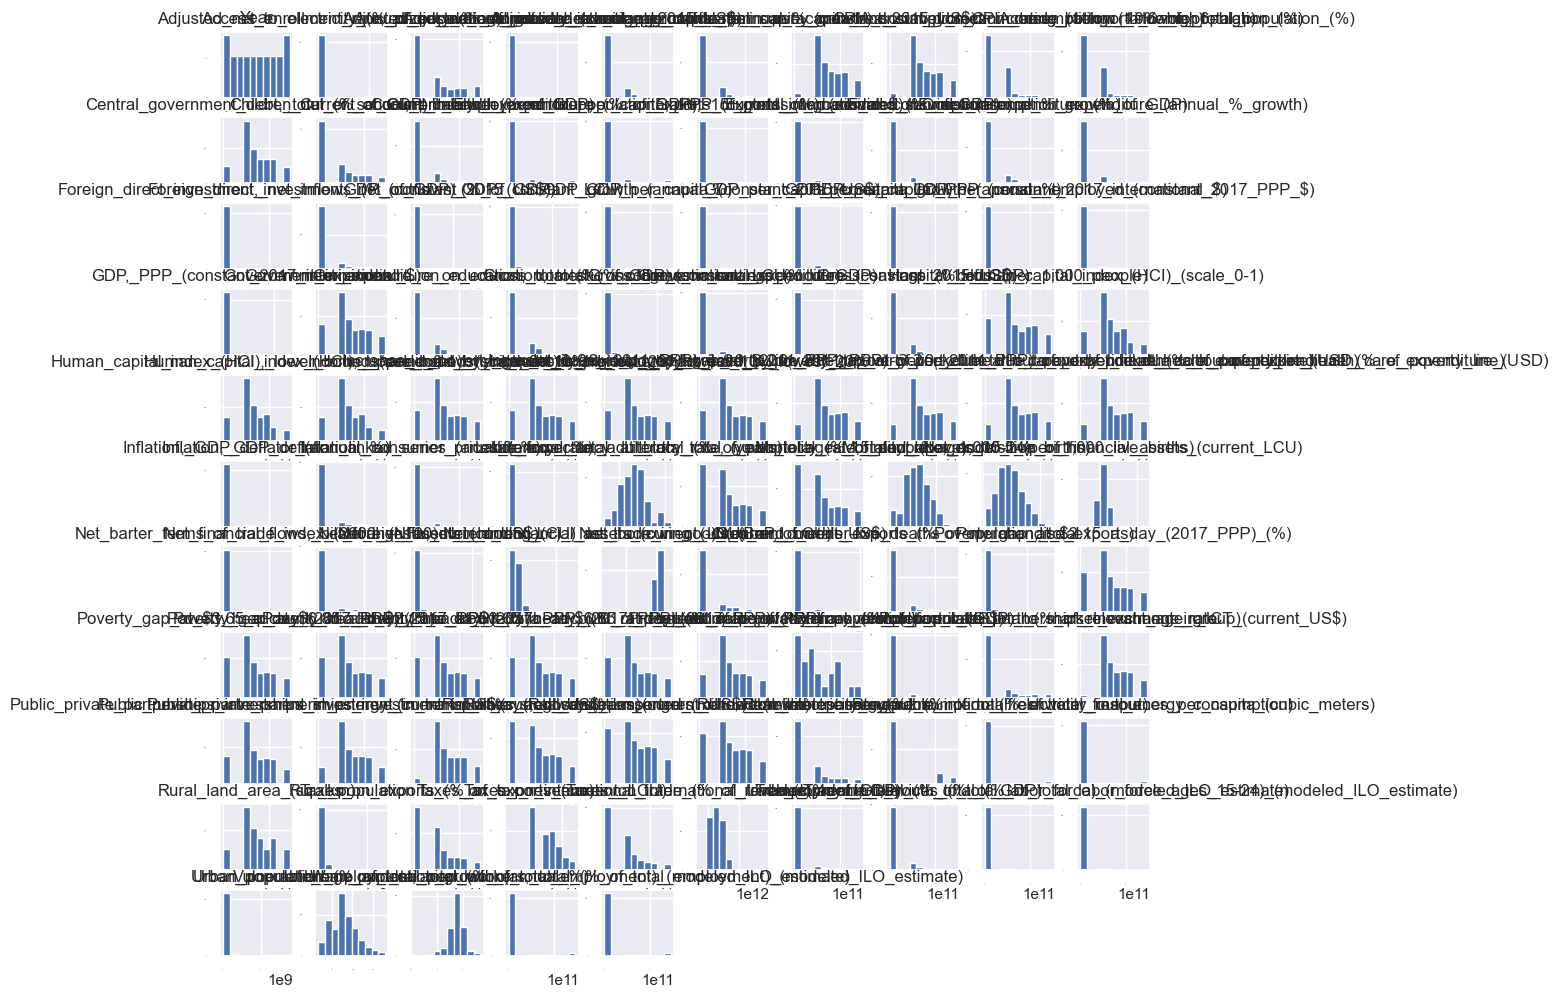

In [9]:
# Plot histograms across dataframe
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

<Axes: title={'center': 'Correlation Matrix'}>

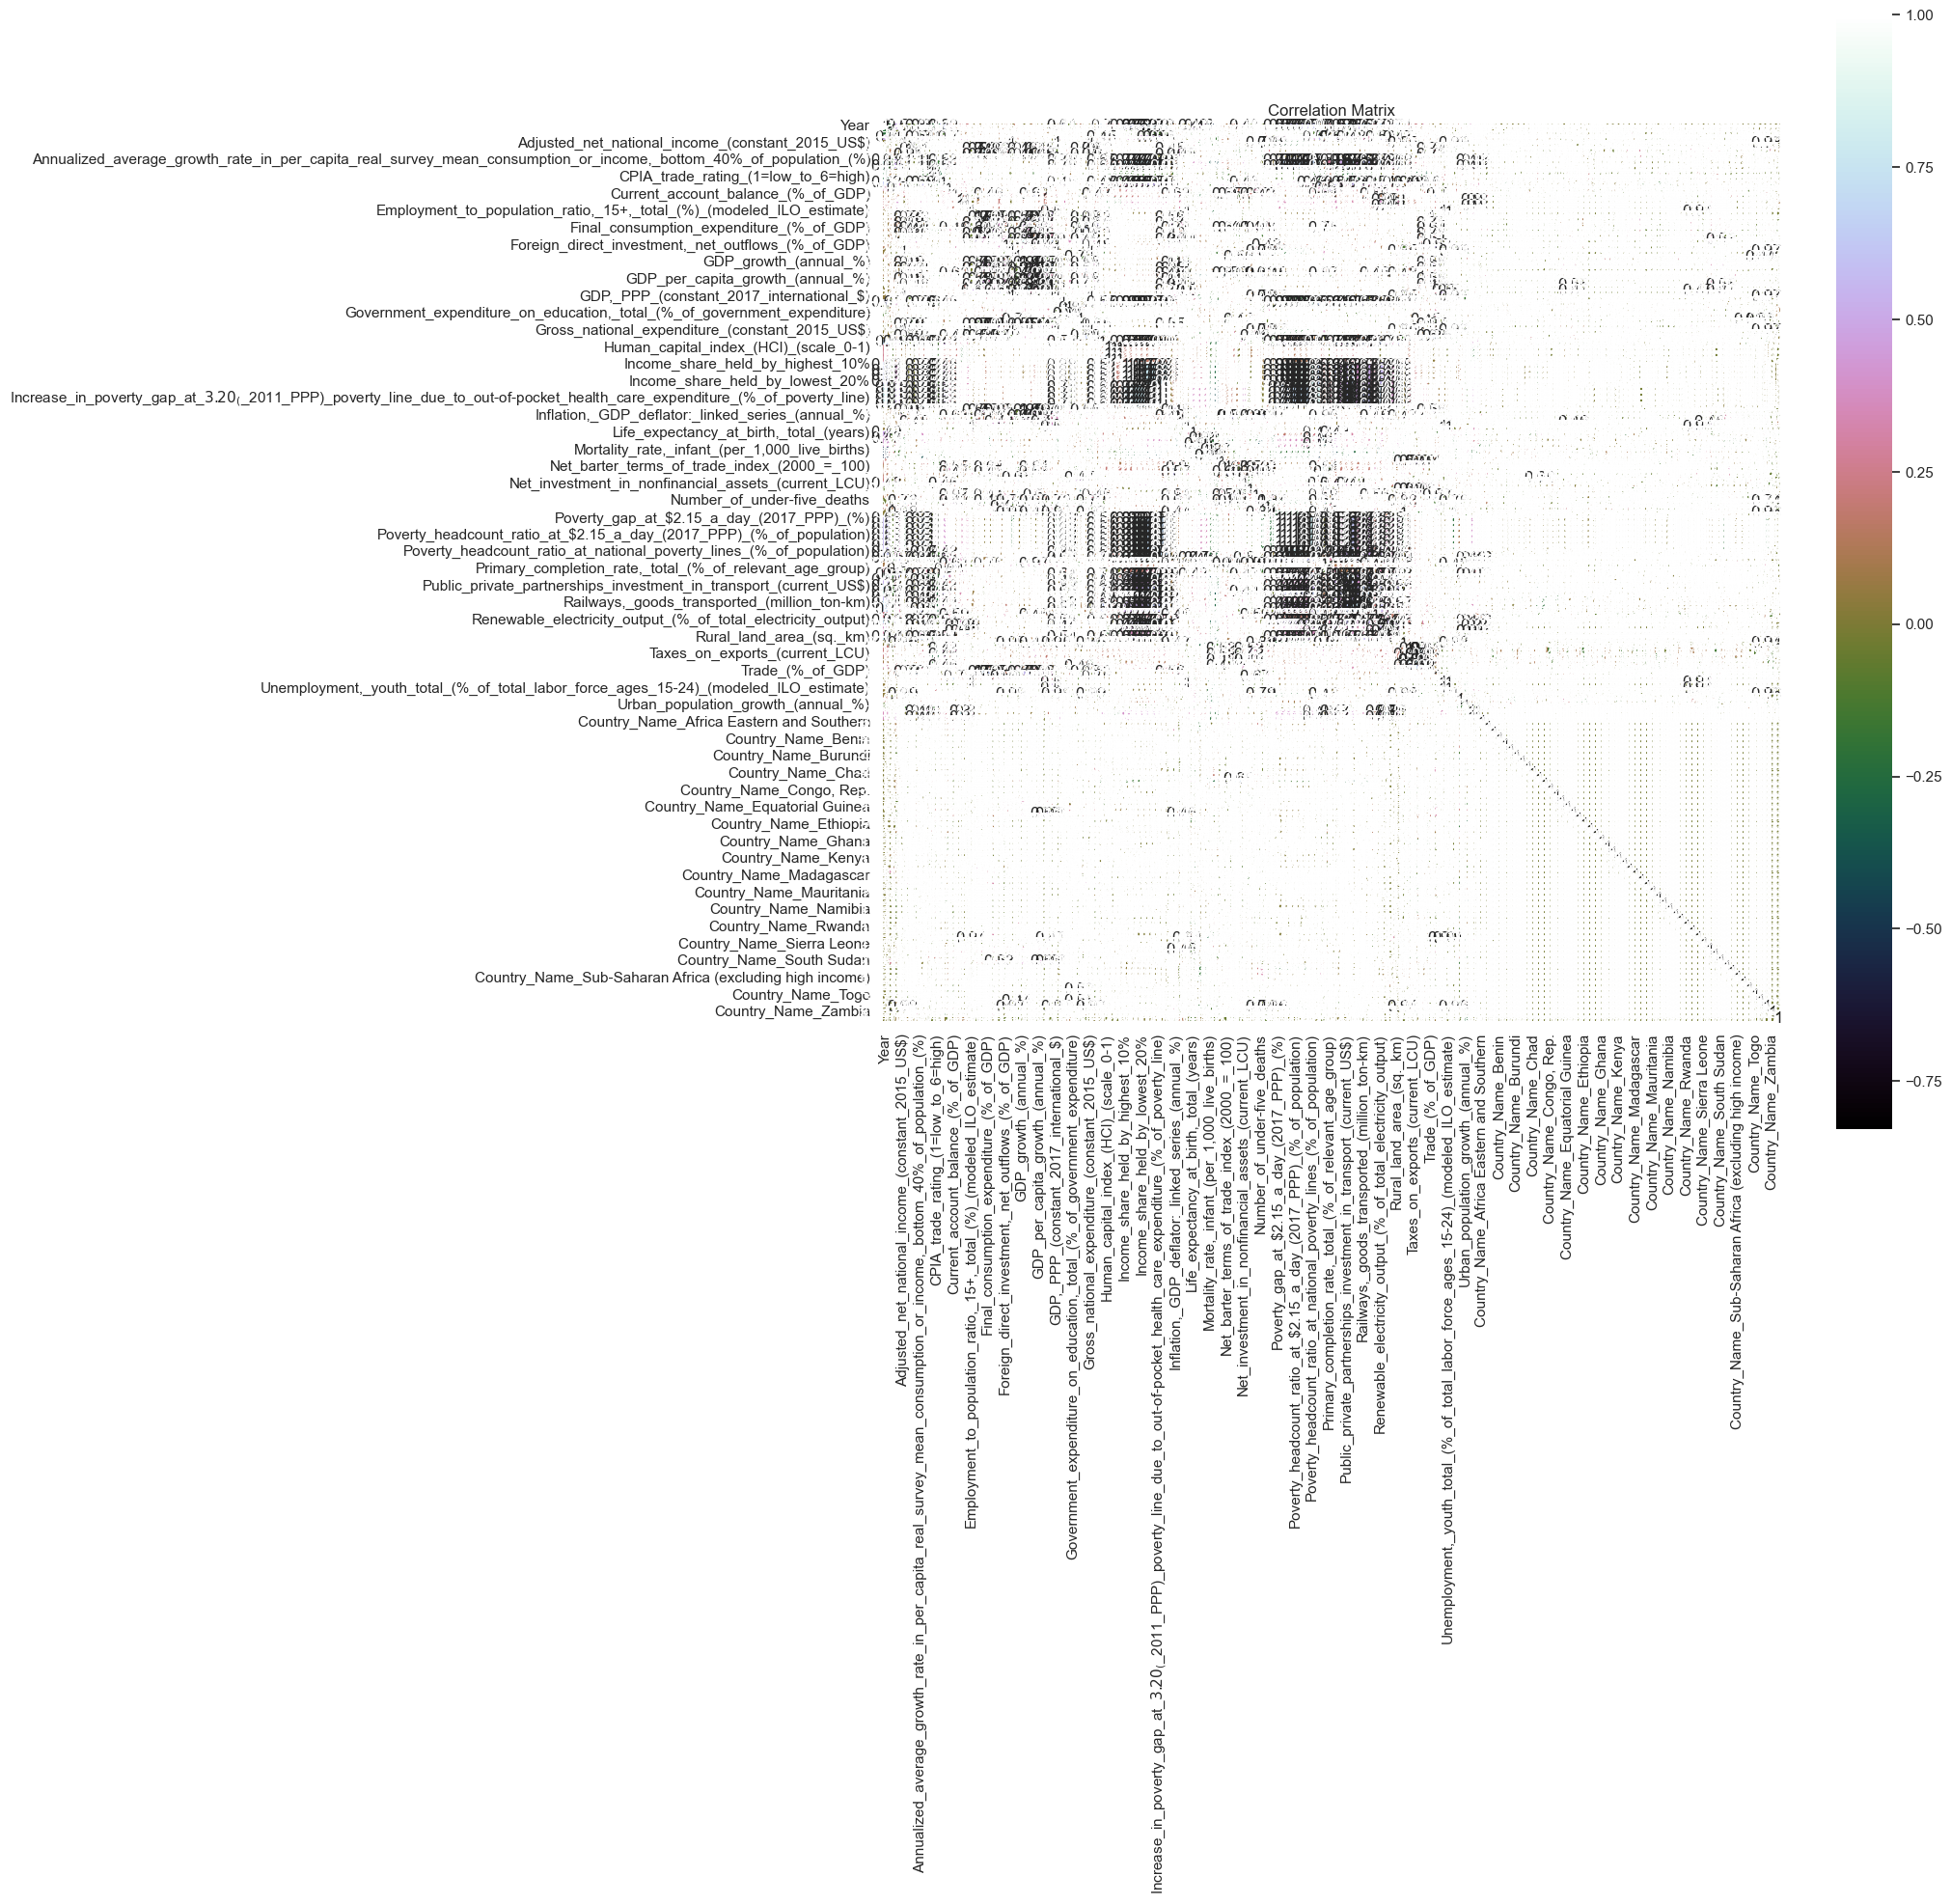

In [11]:
# Plot correlation across dataframe 

correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [7]:
# Test variables for regression scoring

num_folds = 10
scoring = 'neg_mean_squared_error'

In [13]:
# Define the regression models (Linear, SVM, Random Forest and ANN)

models = []
models.append(('LR', LinearRegression()))
models.append(('SVM', SVR()))  # Add Support Vector Machine (SVM)
models.append(('RF', RandomForestRegressor()))  # Add Random Forest
models.append(('ANN', MLPRegressor())) #Add Multi Layer Perceptron (ANN)

In [14]:
# Calculate results for all models using negative MSE (lower score is better as less error) 

kfold_results = []
names = []
validation_results = []
train_results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    names.append(name)

    # Finally we Train on the full period and test against validation
    res = model.fit(X_train, Y_train)
    validation_result = np.mean(np.square(res.predict(X_validation) - Y_validation))
    validation_results.append(validation_result)
    train_result = np.mean(np.square(res.predict(X_train) - Y_train))
    train_results.append(train_result)
    
    msg = "%s: \nAverage CV error: %s \nStd CV Error: (%s) \nTraining Error:\n%s \nTest Error:\n%s" % \
    (name, str(cv_results.mean()), str(cv_results.std()), str(train_result), str(validation_result))
    print(msg)
    print('----------')

LR: 
Average CV error: 55289221496.86047 
Std CV Error: (38349685316.69412) 
Training Error:
24043489887.114296 
Test Error:
2.8363712127613145e+30
----------
SVM: 
Average CV error: 7.883594188641679e+21 
Std CV Error: (3.8523378598468696e+21) 
Training Error:
7.884382885371912e+21 
Test Error:
4.5347082257938294e+21
----------
RF: 
Average CV error: 3.020977803944672e+20 
Std CV Error: (5.4310237309723974e+20) 
Training Error:
3.3149463593806266e+19 
Test Error:
1.1457960211504427e+21
----------
ANN: 
Average CV error: 7.471309000086917e+21 
Std CV Error: (1.2470567169549073e+22) 
Training Error:
5.776277535974719e+20 
Test Error:
2.0648734906327488e+21
----------


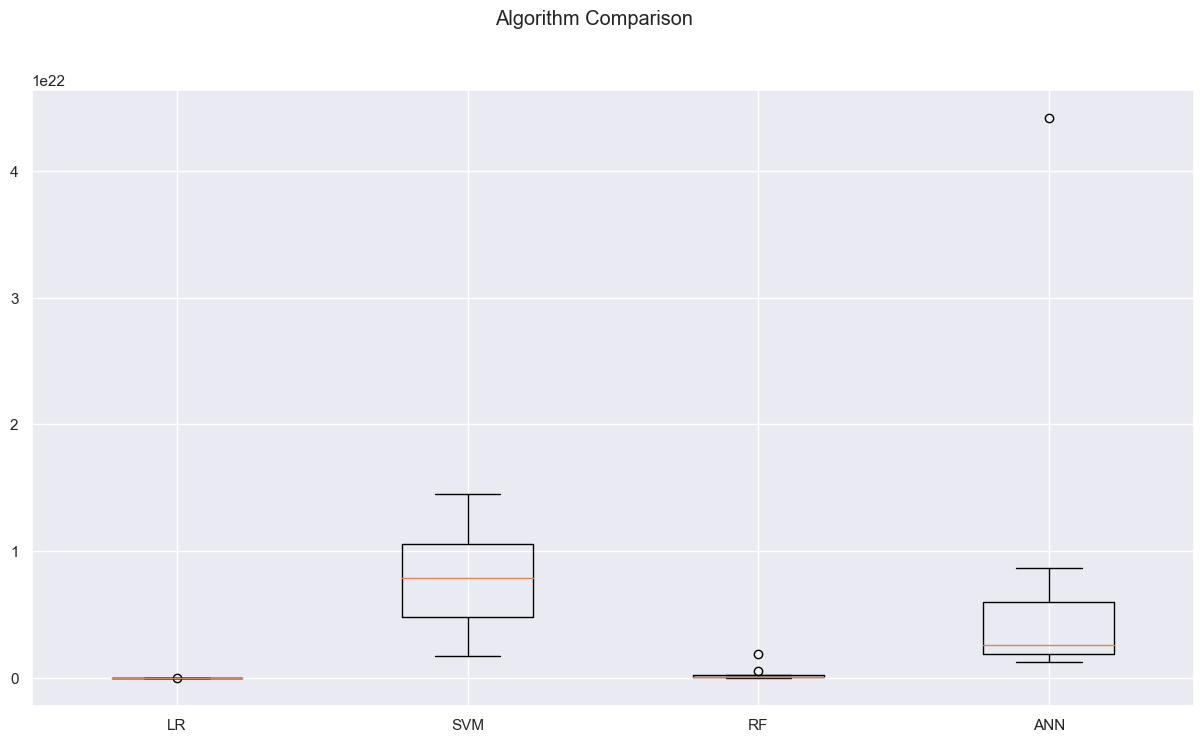

In [15]:
# Algorithm comparison using Boxplots

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

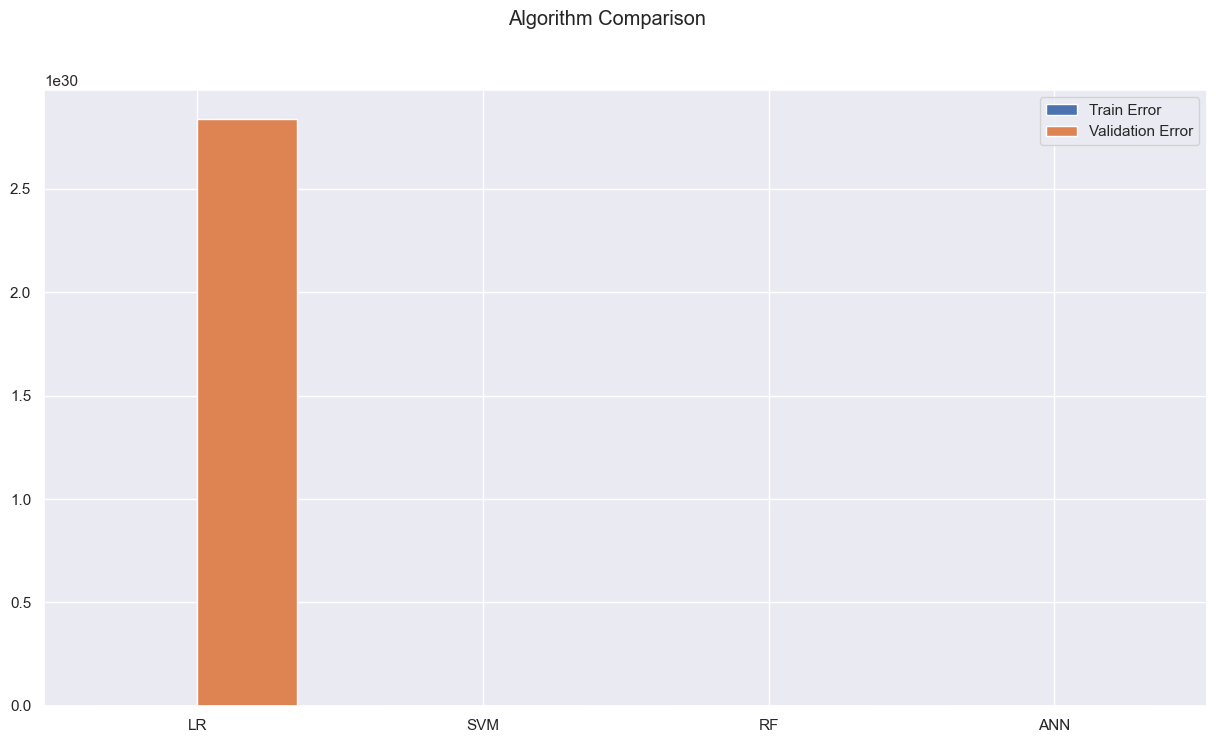

In [16]:
# Algorithm comparison using Bar chart

fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, [x.mean() for x in train_results],  width=width, label='Train Error')
pyplot.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [8]:
#Re-test but remove Linear (due to skew on visualisation from Validation score)

models = []

models.append(('SVM', SVR()))  # Add Support Vector Machine (SVM)
models.append(('RF', RandomForestRegressor()))  # Add Random Forest
models.append(('ANN', MLPRegressor())) #Add Multi Layer Perceptron (ANN)

In [9]:
# Calculate results for all models using negative MSE (lower score is better as less error) 

kfold_results = []
names = []
validation_results = []
train_results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    names.append(name)

    # Finally we Train on the full period and test against validation
    res = model.fit(X_train, Y_train)
    validation_result = np.mean(np.square(res.predict(X_validation) - Y_validation))
    validation_results.append(validation_result)
    train_result = np.mean(np.square(res.predict(X_train) - Y_train))
    train_results.append(train_result)
    
    msg = "%s: \nAverage CV error: %s \nStd CV Error: (%s) \nTraining Error:\n%s \nTest Error:\n%s" % \
    (name, str(cv_results.mean()), str(cv_results.std()), str(train_result), str(validation_result))
    print(msg)
    print('----------')

SVM: 
Average CV error: 7.883594188641679e+21 
Std CV Error: (3.8523378598468696e+21) 
Training Error:
7.884382885371912e+21 
Test Error:
4.5347082257938294e+21
----------
RF: 
Average CV error: 2.9565083865895076e+20 
Std CV Error: (5.5763312999875464e+20) 
Training Error:
4.608000739164001e+19 
Test Error:
1.250118074906003e+21
----------
ANN: 
Average CV error: 3.0255930943948073e+21 
Std CV Error: (1.805993083244368e+21) 
Training Error:
1.384352151626727e+21 
Test Error:
2.693224012791746e+21
----------


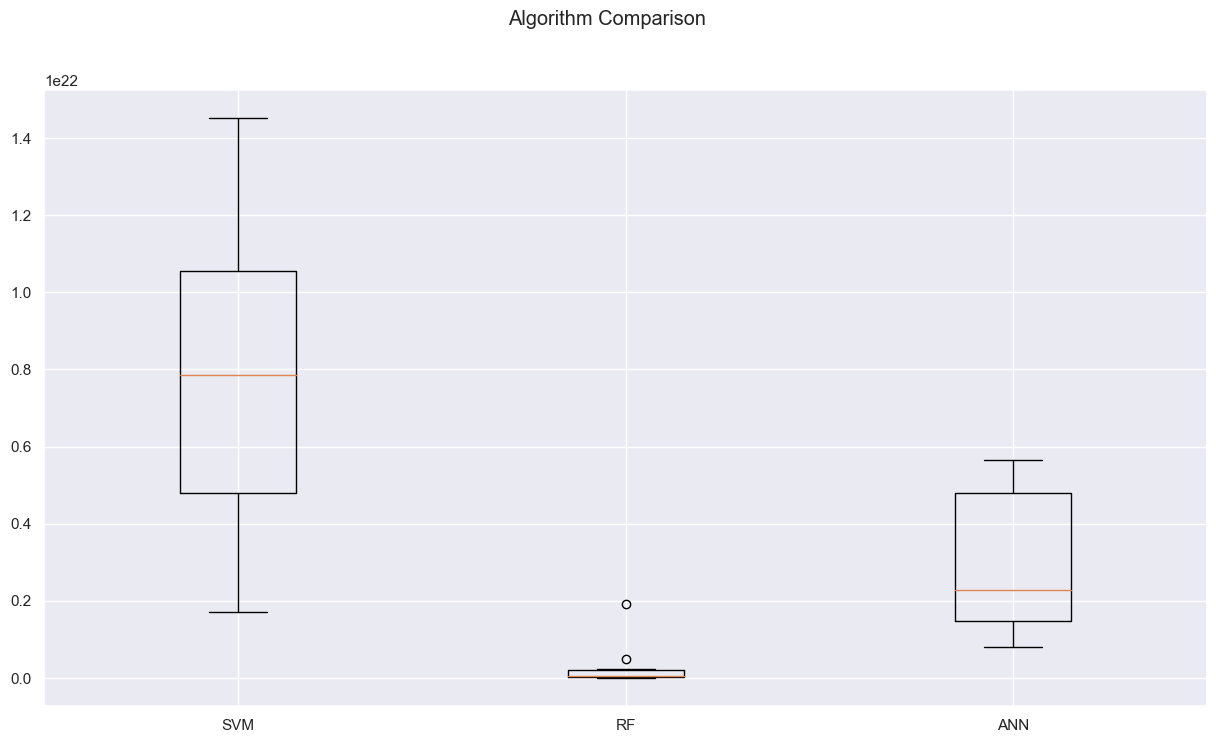

In [10]:
# Algorithm comparison using Boxplots

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

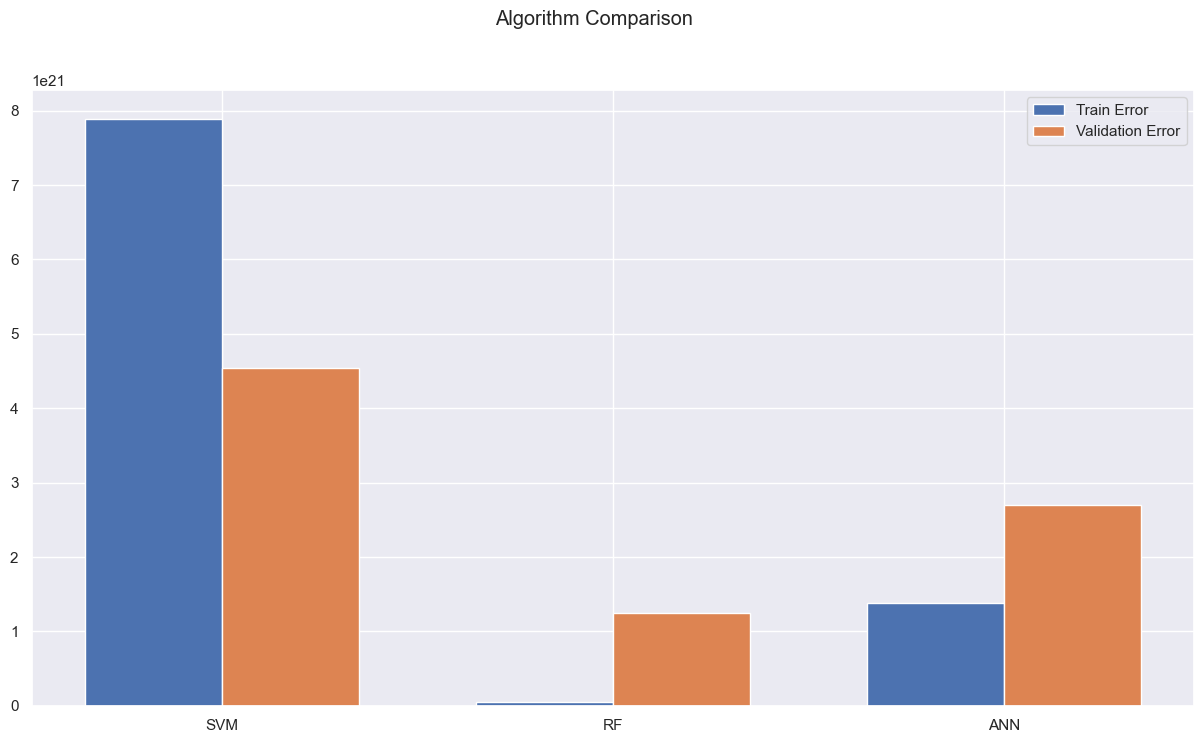

In [11]:
# Algorithm comparison using Bar chart

fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, [x.mean() for x in train_results],  width=width, label='Train Error')
pyplot.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

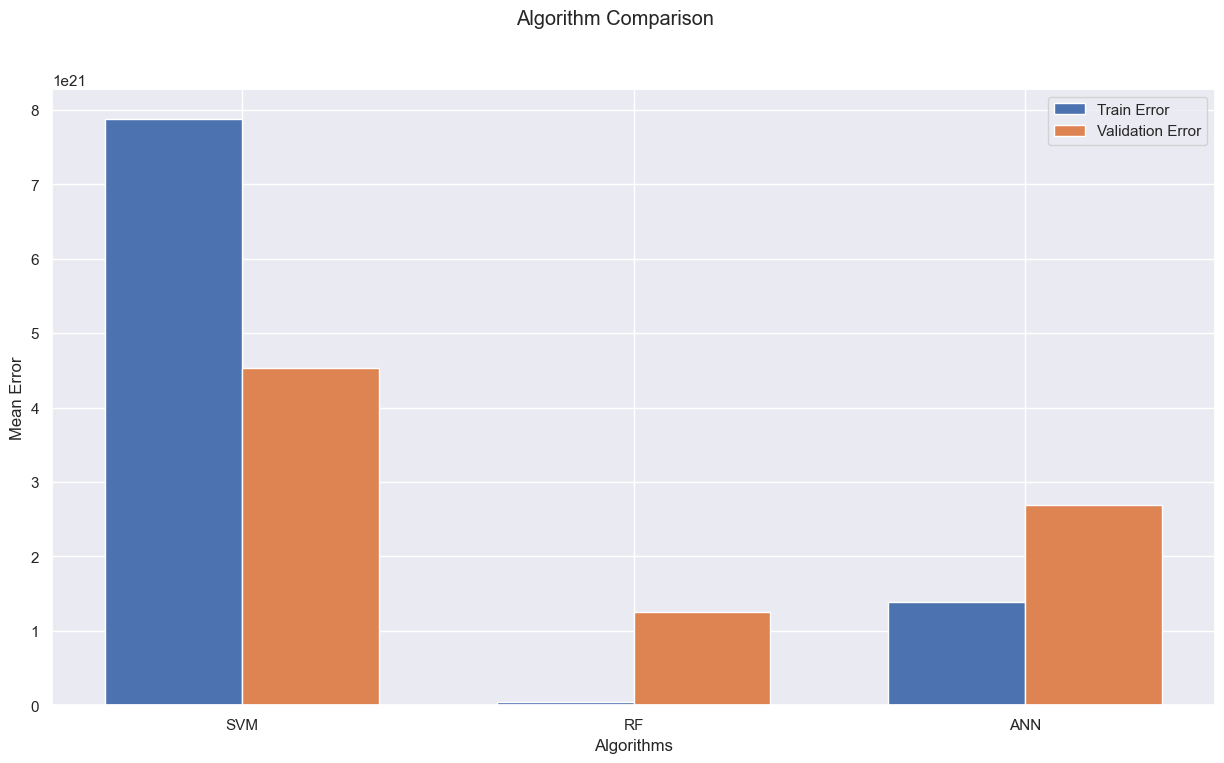

In [14]:
# Algorithm comparison using Bar chart
fig, ax = plt.subplots()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax.bar(ind - width/2, [x.mean() for x in train_results], width=width, label='Train Error')
ax.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(15, 8)
ax.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
ax.set_xlabel('Algorithms')  # Adding x-axis label
ax.set_ylabel('Mean Error')  # Adding y-axis label

plt.show()


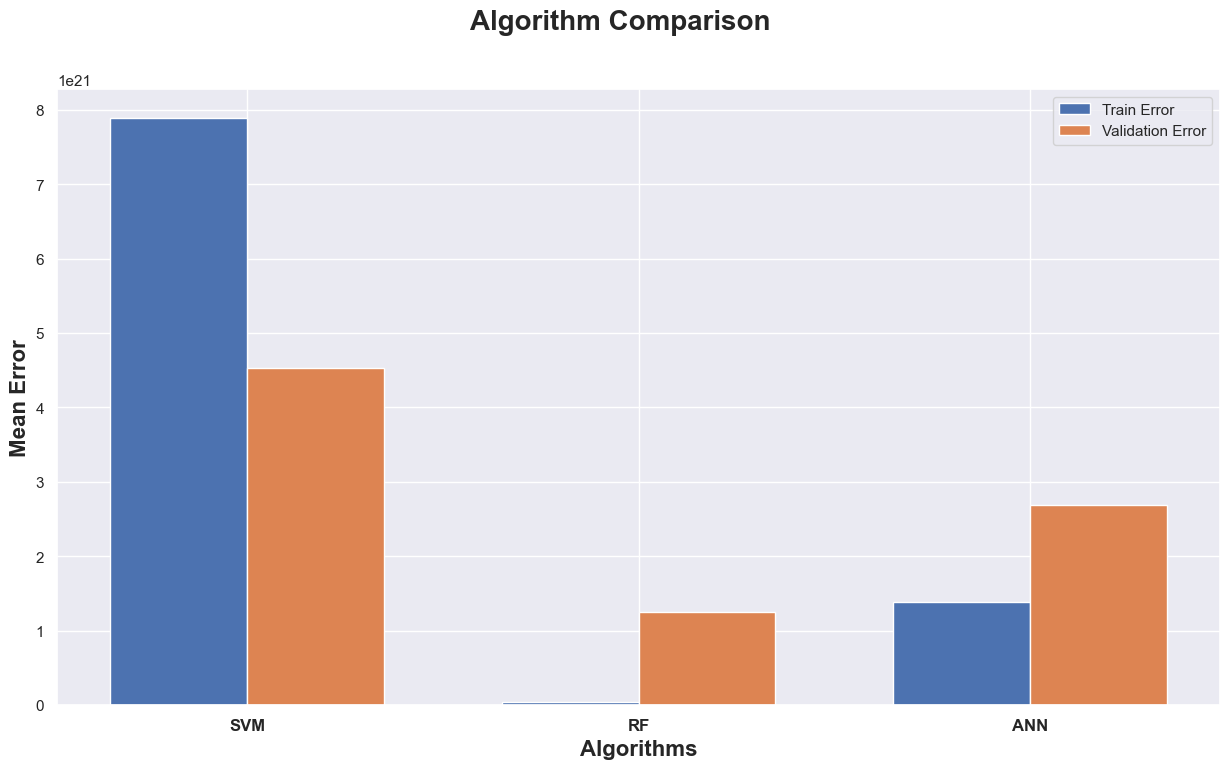

In [19]:
# Algorithm comparison using Bar chart
fig, ax = plt.subplots()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison', fontsize=20, fontweight='bold')  # Increase font size and set font weight
ax.bar(ind - width/2, [x.mean() for x in train_results], width=width, label='Train Error')
ax.bar(ind + width/2, [x.mean() for x in validation_results], width=width, label='Validation Error')
fig.set_size_inches(15, 8)
ax.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names, fontsize=12, fontweight='bold')
ax.set_xlabel('Algorithms', fontsize=16, fontweight='bold')  # Adding x-axis label
ax.set_ylabel('Mean Error', fontsize=16, fontweight='bold')  # Adding y-axis label

plt.show()


In [20]:
# Test 1. Grid search : MLPRegressor 
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.
'''
param_grid={'hidden_layer_sizes': [(20,), (50,), (20,20), (20, 30, 20)]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -592640427396798873600.000000 using {'hidden_layer_sizes': (20, 30, 20)}
-5161380623438001995776.000000 (3176909165929363406848.000000) with: {'hidden_layer_sizes': (20,)}
-5985809315240396980224.000000 (6391725778970238517248.000000) with: {'hidden_layer_sizes': (50,)}
-1324882729614778040320.000000 (784028398815562956800.000000) with: {'hidden_layer_sizes': (20, 20)}
-592640427396798873600.000000 (452029027662098661376.000000) with: {'hidden_layer_sizes': (20, 30, 20)}


In [21]:
# Prepare model
model = MLPRegressor(hidden_layer_sizes= (20, 30, 20))
model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(20, 30, 20))

In [22]:
dataset.shape

(1166, 158)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
# Validate scores for chosen metrics(R2, MSE, AdjR2, RMSE and MAE)

predictions = model.predict(X_validation)
r2_MLP = r2_score(Y_validation, predictions)
mse_MLP = mean_squared_error(Y_validation, predictions)
mae_MLP = mean_absolute_error(Y_validation, predictions)
rmse_MLP = np.sqrt(mse_MLP)

# Calculate Adjusted R2 score
R2 = r2_MLP  
n = 1166
p = 157 
adjusted_R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)

# Print score results 
print("R2 MLP = %f" % r2_MLP)
print("MSE MLP = %f" % mse_MLP)
print("MAE MLP = %f" % mae_MLP)
print("RMSE MLP = %f" % rmse_MLP)
print("Adjusted R2 MLP = %f" % adjusted_R2)


R2 MLP = 0.954670
MSE MLP = 198463086833693818880.000000
MAE MLP = 7751428858.444473
RMSE MLP = 14087692743.444323
Adjusted R2 MLP = 0.947609


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [24]:
# Test 2. Grid search : MLPRegressor 


param_grid = {"hidden_layer_sizes": [(1,),(50,), (20,20), (20, 30, 20)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -179483053190453067776.000000 using {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (20, 30, 20), 'solver': 'lbfgs'}
-903995260138837770240.000000 (876342010763075911680.000000) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'solver': 'sgd'}
-7534428878053453070336.000000 (8592963506117508333568.000000) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'solver': 'adam'}
-706064516848613457920.000000 (365163540650757980160.000000) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (50,), 'solver': 'sgd'}
-3997680907195170947072.000000 (4195075529762313076736.000000) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
-563584823246319124480

In [25]:
# Fit model using optimal featrues as per test above

model = MLPRegressor(hidden_layer_sizes= (20, 30, 20), activation= ('relu'), solver= ('lbfgs'), alpha=(0.0005))
model.fit(X_train, Y_train)

MLPRegressor(alpha=0.0005, hidden_layer_sizes=(20, 30, 20), solver='lbfgs')

In [26]:
# Validate scores for chosen metrics (R2, MSE, AdjR2, RMSE and MAE)

predictions = model.predict(X_validation)
r2_MLP = r2_score(Y_validation, predictions)
mse_MLP = mean_squared_error(Y_validation, predictions)
mae_MLP = mean_absolute_error(Y_validation, predictions)
rmse_MLP = np.sqrt(mse_MLP)

# Calculate Adjusted R2 score
R2 = r2_MLP  
n = 1166
p = 157 
adjusted_R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)

# Print score results 
print("R2 MLP = %f" % r2_MLP)
print("MSE MLP = %f" % mse_MLP)
print("MAE MLP = %f" % mae_MLP)
print("RMSE MLP = %f" % rmse_MLP)
print("Adjusted R2 MLP = %f" % adjusted_R2)

R2 MLP = 0.913673
MSE MLP = 377955477972248821760.000000
MAE MLP = 9240456737.634256
RMSE MLP = 19441077078.501820
Adjusted R2 MLP = 0.900227


In [28]:
# Test 3. Grid search : MLPRegressor - Add Epochs (Iter) and increase test Alpha value range


param_grid = {"hidden_layer_sizes": [(1,),(50,), (20,20), (20, 30, 20)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005,0.005, 0.05], "max_iter": [20, 50, 100, 200, 250]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    
# Large computational cost of fit above - results = {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20, 30, 20), 'max_iter': 250, 'solver': 'lbfgs'}    

Best: -93922116183674011648.000000 using {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (20, 30, 20), 'max_iter': 250, 'solver': 'lbfgs'}
-17785580937734432751616.000000 (11721921690906138771456.000000) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'max_iter': 20, 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'max_iter': 20, 'solver': 'sgd'}
-1291834157406781949607936.000000 (1567568398405748381450240.000000) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'max_iter': 20, 'solver': 'adam'}
-3705760044837000708096.000000 (2052535385886684348416.000000) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'max_iter': 50, 'solver': 'lbfgs'}
nan (nan) with: {'activation': 'identity', 'alpha': 5e-05, 'hidden_layer_sizes': (1,), 'max_iter': 50, 'solver': 'sgd'}
-679337919637173403910144.000000 (1331773302676502496673792.000000) with: {

In [29]:
# Fit model using optimal featrues as per test above


model = MLPRegressor(hidden_layer_sizes= (20, 30, 20), activation= ('relu'), solver= ('lbfgs'), alpha=(0.05), max_iter= (250))
model.fit(X_train, Y_train)

MLPRegressor(alpha=0.05, hidden_layer_sizes=(20, 30, 20), max_iter=250,
             solver='lbfgs')

In [30]:
# Validate scores for chosen metrics (R2, MSE, AdjR2)

predictions = model.predict(X_validation)
r2_MLP = r2_score(Y_validation, predictions)
mse_MLP = mean_squared_error(Y_validation, predictions)
mae_MLP = mean_absolute_error(Y_validation, predictions)
rmse_MLP = np.sqrt(mse_MLP)

# Calculate Adjusted R2 score
R2 = r2_MLP  
n = 1166
p = 157 
adjusted_R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)

# Print score results 
print("R2 MLP = %f" % r2_MLP)
print("MSE MLP = %f" % mse_MLP)
print("MAE MLP = %f" % mae_MLP)
print("RMSE MLP = %f" % rmse_MLP)
print("Adjusted R2 MLP = %f" % adjusted_R2)

R2 MLP = 0.961868
MSE MLP = 166948254166925574144.000000
MAE MLP = 7056641110.237226
RMSE MLP = 12920845721.814249
Adjusted R2 MLP = 0.955929


In [35]:
# Test 4 - Using hyperparameters identified above along with l1 (Lasso) regularisation

from sklearn.neural_network import MLPRegressor

model4 = MLPRegressor(alpha=0.0001)


In [36]:
model4 = MLPRegressor(
    hidden_layer_sizes=(20, 30, 20),
    activation='relu',
    solver='lbfgs',
    alpha=0.0001,
    max_iter=250,
)

model4.fit(X_train, Y_train)


MLPRegressor(hidden_layer_sizes=(20, 30, 20), max_iter=250, solver='lbfgs')

In [37]:
# Validate scores for chosen metrics (R2, MSE, AdjR2, RMSE and MAE)

predictions = model4.predict(X_validation)
r2_MLP = r2_score(Y_validation, predictions)
mse_MLP = mean_squared_error(Y_validation, predictions)
mae_MLP = mean_absolute_error(Y_validation, predictions)
rmse_MLP = np.sqrt(mse_MLP)

# Calculate Adjusted R2 score
R2 = r2_MLP  
n = 1166
p = 157 
adjusted_R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)

# Print score results 
print("R2 MLP = %f" % r2_MLP)
print("MSE MLP = %f" % mse_MLP)
print("MAE MLP = %f" % mae_MLP)
print("RMSE MLP = %f" % rmse_MLP)
print("Adjusted R2 MLP = %f" % adjusted_R2)

R2 MLP = 0.906076
MSE MLP = 411215619157228257280.000000
MAE MLP = 10399907709.149551
RMSE MLP = 20278452089.773228
Adjusted R2 MLP = 0.891447
